In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold6_3.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.057919,-0.104299,0.559999,0.334676,-0.211875,0.143230,0.351069,-0.194544,-0.164327,0.162054,...,-0.184839,0.000211,0.225336,-0.062542,0.532555,-0.094168,Abnormal,P1,FP-A,AB01
1,-0.205751,-0.159286,0.188796,0.215051,-0.205882,0.252646,0.195647,-0.230761,-0.191521,0.107694,...,-0.201683,-0.163186,0.217547,-0.084396,0.402628,-0.153527,Abnormal,P1,FP-A,AB02
2,-0.194917,-0.128507,-0.025262,0.202529,-0.202233,0.146810,0.111522,-0.193777,-0.159751,0.086466,...,-0.152746,-0.122986,0.055055,-0.115639,0.333894,-0.142968,Abnormal,P1,FP-A,AB03
3,-0.193768,-0.150722,-0.029017,0.215692,-0.219698,0.657656,0.575939,-0.219614,-0.125709,-0.034037,...,-0.194065,0.411503,0.553589,-0.105359,0.675958,-0.175017,Abnormal,P1,FP-A,AB04
4,-0.165939,-0.173695,0.084442,0.479525,-0.223586,0.271616,0.371645,-0.211414,-0.205298,-0.062518,...,-0.186756,0.678532,-0.021070,-0.096439,0.158125,-0.182546,Abnormal,P1,FP-A,AB05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,0.432871,0.512395,-0.203722,0.040187,0.578012,-0.019369,-0.175482,0.250025,0.197643,-0.191814,...,0.590799,-0.148868,-0.174744,0.725114,-0.207958,0.394110,Normal,P8,FP-E,Normal
7340,0.235443,0.604847,-0.207820,0.054113,0.807931,0.138333,-0.176238,0.517748,0.240770,-0.038638,...,0.725948,-0.154207,-0.180142,0.824987,-0.169584,0.573344,Normal,P8,FP-E,Normal
7341,0.403546,0.511136,-0.202464,-0.114024,0.715752,-0.066011,-0.172875,0.497135,0.253090,-0.092089,...,0.794905,-0.160461,-0.174855,0.776387,-0.193267,0.622633,Normal,P8,FP-E,Normal
7342,0.027443,0.209076,-0.190624,-0.115367,0.366976,-0.155977,-0.190449,0.093199,0.041518,-0.133924,...,0.373563,-0.177400,-0.195169,0.583636,-0.091433,0.412595,Normal,P8,FP-E,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(7344, 2048)
(7344,)


In [20]:
y[0]

'FP-A'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.538708,0.091782,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.537892,0.092908,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.537755,0.093196,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.538435,0.092574,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.525636,0.093896,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.726507,0.128659,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.721197,0.131592,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.712483,0.129167,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.704723,0.132498,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.621650,0.118653,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5387078537136926

 **print the array of mean scores only 

[0.53870785 0.53789153 0.53775473 0.538435   0.52563643 0.72650726
 0.72119724 0.7124829  0.70472261 0.62165026 0.812155   0.81365215
 0.81024894 0.81106452 0.69560029 0.81433168 0.81487794 0.81406087
 0.8147404  0.7101709  0.81433057 0.81787151 0.81569297 0.81719124
 0.71017183]

 **examine the best model 

0.817871508276335
{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=400,
                       random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 400}
Best score is 0.817871508276335


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 5) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold6_3.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.055907,-0.051882,-0.040278,0.264976,-0.087209,-0.196564,-0.056968,-0.128653,-0.039314,...,-0.091600,-0.206813,-0.136027,0.191068,0.083183,-0.070875,Abnormal,P1,FP-A,AB01
1,1,-0.158361,-0.179731,0.282867,0.260556,-0.198368,0.054077,0.093965,-0.168819,-0.176397,...,-0.164888,-0.155402,0.145854,-0.118567,0.295510,-0.105553,Abnormal,P1,FP-A,AB02
2,2,-0.190353,-0.166700,0.173064,0.336238,-0.213590,0.169006,0.044973,-0.150350,-0.207814,...,-0.139779,0.162308,0.039460,-0.037974,0.308129,-0.126502,Abnormal,P1,FP-A,AB03
3,3,-0.030163,-0.160920,-0.025277,0.444823,-0.168903,0.170418,0.557955,-0.083914,-0.165666,...,-0.154191,0.250303,0.513003,-0.088720,0.424203,-0.158501,Abnormal,P1,FP-A,AB04
4,4,-0.141455,-0.174257,-0.127677,0.272662,-0.162064,0.148980,0.395592,-0.019139,-0.127176,...,-0.165763,0.232291,0.260357,-0.130044,0.420623,-0.160887,Abnormal,P1,FP-A,AB06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,-0.122954,0.209771,-0.216331,-0.064288,0.063501,-0.202775,-0.201548,0.080951,-0.009770,...,-0.054826,-0.171935,-0.072377,0.016204,-0.193050,0.011045,Normal,P8,FP-E,Normal
1031,1031,-0.120600,0.116369,-0.199377,-0.086031,-0.066019,-0.181562,-0.165780,-0.149596,0.060642,...,-0.085272,-0.098684,-0.098271,0.031458,-0.118339,-0.103795,Normal,P8,FP-E,Normal
1032,1032,0.364955,0.502602,-0.232104,-0.163024,0.687879,-0.200081,-0.212717,0.134577,0.429816,...,0.812059,-0.205081,-0.150918,0.435073,-0.227222,0.262645,Normal,P8,FP-E,Normal
1033,1033,-0.043380,0.170674,-0.222938,-0.189437,0.218148,-0.151236,-0.187092,0.114719,0.169700,...,-0.008692,-0.169950,-0.161646,0.067236,-0.203227,0.231913,Normal,P8,FP-E,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1035, 2048)
(1035,)


In [30]:
y_test

0       FP-A
1       FP-A
2       FP-A
3       FP-A
4       FP-A
        ... 
1030    FP-E
1031    FP-E
1032    FP-E
1033    FP-E
1034    FP-E
Name: Views, Length: 1035, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 67  41  74   5   1]
 [ 13 196  84   3  11]
 [  6  33 261  15   0]
 [  0   9  55 113   3]
 [  1   6   3   3  32]]
              precision    recall  f1-score   support

        FP-A       0.77      0.36      0.49       188
        FP-B       0.69      0.64      0.66       307
        FP-C       0.55      0.83      0.66       315
        FP-D       0.81      0.63      0.71       180
        FP-E       0.68      0.71      0.70        45

    accuracy                           0.65      1035
   macro avg       0.70      0.63      0.64      1035
weighted avg       0.68      0.65      0.64      1035



Text(0.5, 21.5, 'Predicted label')

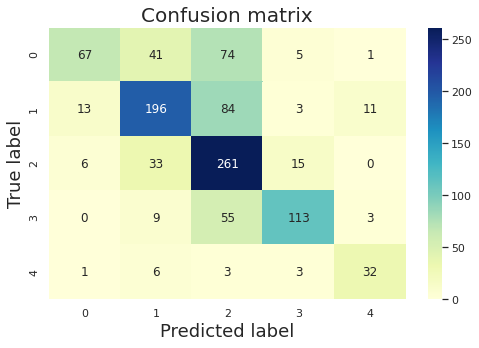

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_6/models/')
filename = "modelrf_AN_5FP_fold6_3.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)